In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet

In [2]:
df = pd.read_csv('../../data/cleaned/weekseries_04_19.csv')
df.rename({'acc_nr':'y'}, axis=1, inplace=True)

In [3]:
pred_len = 5

def get_mse_pr_bl(test_back): 
    ds_train = df[:-(pred_len+test_back)]
    ds_test = df[-(pred_len+test_back):-test_back]

    m = Prophet(yearly_seasonality=52) 
    m.add_country_holidays(country_name='US')
    m.fit(ds_train)
    future = m.make_future_dataframe(periods=pred_len,freq='W',include_history=True)

    forecast = m.predict(future)

    y_act_past = df['y'][-(52+pred_len+test_back):-(pred_len+test_back)]
    y_base = [y_act_past.mean()]*pred_len

    x = forecast.index.values[-pred_len:]
    y = forecast['yhat'][-pred_len:]
    y_low = forecast['yhat_lower'][-pred_len:]
    y_up = forecast['yhat_upper'][-pred_len:]
    y_act = ds_test.y.values[:pred_len]

    mse_pr = mean_squared_error(y, y_act)
    mse_bl = mean_squared_error(y_base, y_act)
    return [mse_pr, mse_bl]

In [4]:
get_mse_pr_bl(1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[2033.991595267055, 2387.526405325445]

In [5]:
pred_comp = [get_mse_pr_bl(i) for i in range(1,50)]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [6]:
x = range(len(pred_comp))
e_p = [pred_comp[i][0] for i in x]
e_b = [pred_comp[i][1] for i in x]

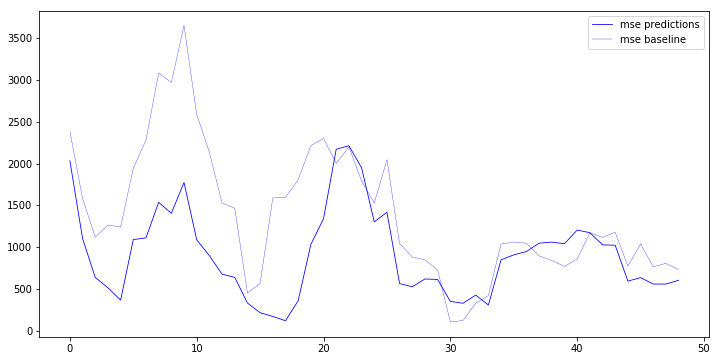

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,e_p, 'b-', label='mse predictions', lw=0.8)
ax.plot(x,e_b, 'b-', label='mse baseline', lw=0.3)
# ax.set_ylim(0,2800)
ax.legend()